Fonte dos dados utilizados: https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cria os dataframes que seram usados para o projeto
valores_ausentes = ['**','##!','***','####','****','*****','NULL']
aeronave = pd.read_csv("https://raw.githubusercontent.com/VictorLobosco/Pandas_Project_Dio/main/aeronave.csv", sep=";", encoding='utf8')
ocorrencia = pd.read_csv("https://raw.githubusercontent.com/VictorLobosco/Pandas_Project_Dio/main/ocorrencia.csv", sep=";", encoding='utf8', parse_dates=['ocorrencia_dia'], dayfirst=True)


In [3]:
#Algumas entradas tem dados não informados, para mostrar isso foi usado os valores guardados na variavel "valores_ausentes", esse codigo muda esses valores para a frase: "Não informado"
aeronave.replace(valores_ausentes, "Não Informado", inplace=True)
ocorrencia.replace(valores_ausentes, "Não Informado", inplace=True)
ocorrencia.fillna("Não Informado", inplace =True)

In [4]:
#Faz um merge entre o dataframe de aeronaves e ocorrencia, as informações de ambos iria ser usadas pra criar alguns graficos então decidi fazer um merge
jdf = pd.merge(ocorrencia ,aeronave, how='left', on=["codigo_ocorrencia2"])
#Cria a tabela mes, essa sera usada pra criação de um grafico mais a frente
jdf["ocorrencia_mes"] = (jdf["ocorrencia_dia"].dt.month).apply(str)
#troca os meses de numero para o nome de cada pra tornar a leitura mais facil
jdf.replace({"1": "Janeiro", "2": "Fevereiro", "3": "Março", "4": "Abril", "5": "Maio", "6": "Junho", "7": "Julho", "8": "Agosto", "9": "Setembro", "10": "Outubro", "11": "Novembro", "12": "Dezembro"}, inplace=True)

# **Veiculos com o maior numero de acidentes no geral**

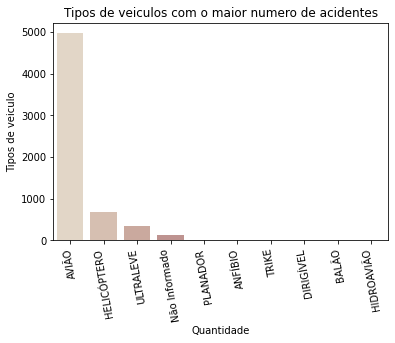

In [6]:
sns.countplot(x="aeronave_registro_categoria", palette="ch:.23", data=jdf, order = jdf["aeronave_registro_categoria"].value_counts().index);
plt.xticks(rotation=100, horizontalalignment ='center');
plt.title("Tipos de veiculos com o maior numero de acidentes");
plt.ylabel("Tipos de veiculo");
plt.xlabel("Quantidade");

# **Segmentos das aeronaves envolvidas em acidente**

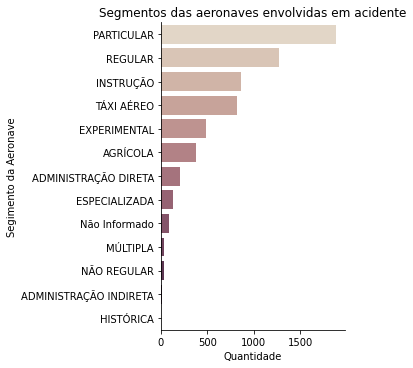

In [8]:
sns.catplot(y="aeronave_registro_segmento", kind="count", palette="ch:.23", data=jdf, order = jdf["aeronave_registro_segmento"].value_counts().index);
plt.title("Segmentos das aeronaves envolvidas em acidente");
plt.ylabel("Segimento da Aeronave");
plt.xlabel("Quantidade");

# **Fases de operação em que os acidentes aconteceram**

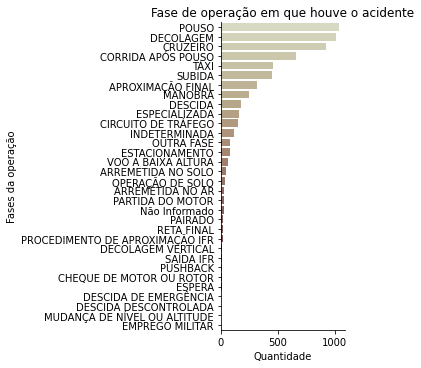

In [9]:
sns.catplot(y="aeronave_fase_operacao", kind="count", palette="ch:.49", data=jdf, order = jdf["aeronave_fase_operacao"].value_counts().index);
plt.title("Fase de operação em que houve o acidente");
plt.ylabel("Fases da operação");
plt.xlabel("Quantidade");

# **Nivel de danos dos acidentes**

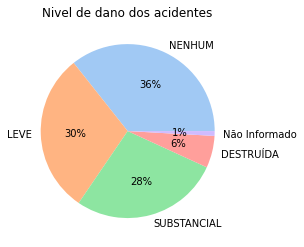

In [10]:
labels = ["NENHUM", "LEVE", "SUBSTANCIAL", "DESTRUÍDA", "Não Informado"]
colors = sns.color_palette('pastel')[0:5]
plt.pie(jdf["aeronave_nivel_dano"].value_counts(), labels= labels, colors = colors, autopct='%.0f%%');
plt.title("Nivel de dano dos acidentes");


# **Estados com os maiores numeros de acidente**

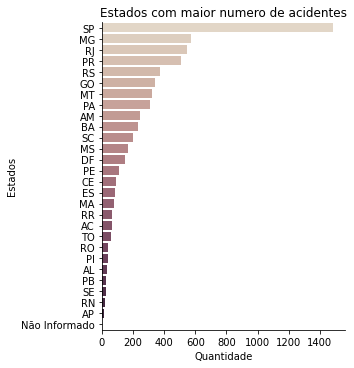

In [11]:
sns.catplot(y="ocorrencia_uf", kind="count", palette="ch:.23", data=jdf, order = jdf["ocorrencia_uf"].value_counts().index);
plt.title("Estados com maior numero de acidentes");
plt.ylabel("Estados");
plt.xlabel("Quantidade");

# **Meses com o maior numero de acidentes no geral**

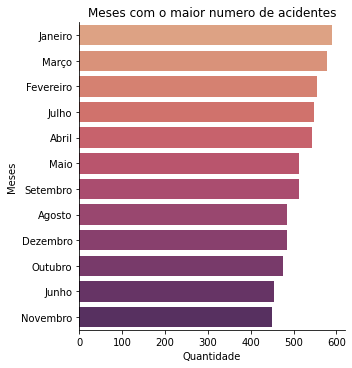

In [13]:
sns.catplot(y="ocorrencia_mes", kind="count", palette="flare", data=jdf, order = jdf["ocorrencia_mes"].value_counts().index);
plt.title("Meses com o maior numero de acidentes");
plt.ylabel("Meses");
plt.xlabel("Quantidade");

# ***Informações dos 3 estados com o maior numero de acidentes***

# **Meses com o maior numero de acidentes em São Paulo**

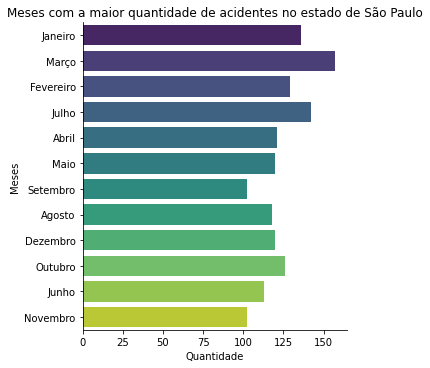

In [14]:
sns.catplot(y="ocorrencia_mes", kind="count", palette="viridis", data=jdf.query("ocorrencia_uf == 'SP'"), order = jdf["ocorrencia_mes"].value_counts().index);
plt.title("Meses com a maior quantidade de acidentes no estado de São Paulo");
plt.ylabel("Meses");
plt.xlabel("Quantidade");

# **Meses com o maior numero de acidentes no Estado de Minas Gerais**

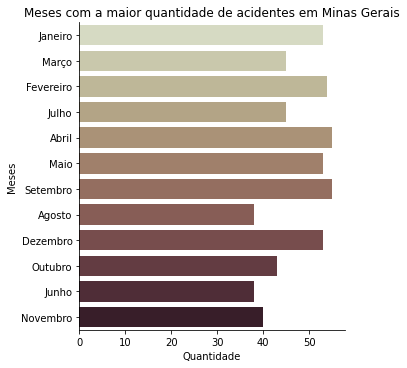

In [15]:
sns.catplot(y="ocorrencia_mes", kind="count", palette="ch:.52", data=jdf.query("ocorrencia_uf == 'MG'"), order = jdf["ocorrencia_mes"].value_counts().index);
plt.title("Meses com a maior quantidade de acidentes em Minas Gerais");
plt.ylabel("Meses");
plt.xlabel("Quantidade");

# **Meses com o maior numero de acidentes no Rio de Janeiro**

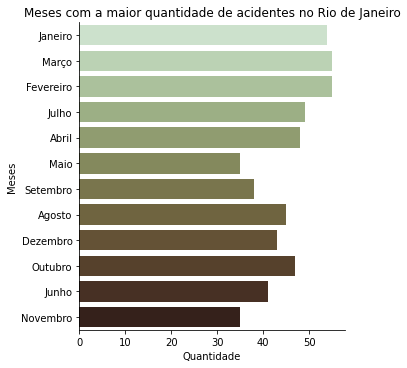

In [16]:
sns.catplot(y="ocorrencia_mes", kind="count", palette="ch:.88", data=jdf.query("ocorrencia_uf == 'RJ'"), order = jdf["ocorrencia_mes"].value_counts().index);
plt.title("Meses com a maior quantidade de acidentes no Rio de Janeiro");
plt.ylabel("Meses");
plt.xlabel("Quantidade");

# **Tipos de Aernoaves com o maior numero de acidentes no Estado de São Paulo**

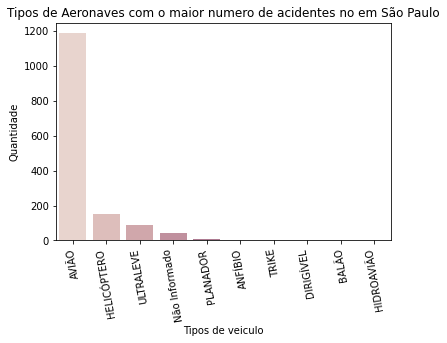

In [17]:
sns.countplot(x="aeronave_registro_categoria", palette="ch:.04", data=jdf.query("ocorrencia_uf == 'SP'"), order = jdf["aeronave_registro_categoria"].value_counts().index);
plt.xticks(rotation=100, horizontalalignment ='center');
plt.title("Tipos de Aeronaves com o maior numero de acidentes no em São Paulo");
plt.ylabel("Quantidade");
plt.xlabel("Tipos de veiculo");

# **Tipos de Aernoaves com o maior numero de acidentes em Minas Gerais**

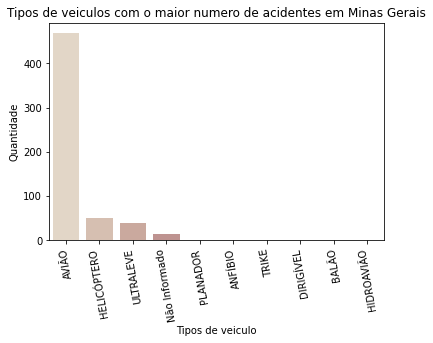

In [18]:
sns.countplot(x="aeronave_registro_categoria", palette="ch:.23", data=jdf.query("ocorrencia_uf == 'MG'"), order = jdf["aeronave_registro_categoria"].value_counts().index);
plt.xticks(rotation=100, horizontalalignment ='center');
plt.title("Tipos de veiculos com o maior numero de acidentes em Minas Gerais");
plt.ylabel("Quantidade");
plt.xlabel("Tipos de veiculo");

# **Tipos de Aernoaves com o maior numero de acidentes no Rio de Janeiro**

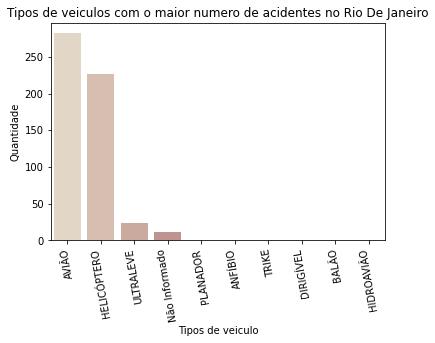

In [19]:
sns.countplot(x="aeronave_registro_categoria", palette="ch:.23", data=jdf.query("ocorrencia_uf == 'RJ'"), order = jdf["aeronave_registro_categoria"].value_counts().index);
plt.xticks(rotation=100, horizontalalignment ='center');
plt.title("Tipos de veiculos com o maior numero de acidentes no Rio De Janeiro");
plt.ylabel("Quantidade");
plt.xlabel("Tipos de veiculo");